# Quamtum Computing Jupyter Notebook
<hr>

## A comparison of quantum computing and classical computing


<b>Quantum computing</b> is the technique of solving computational problems by utilizing all of the possibilities provided by quantum physics' rules. Traditional, or "Classical" computers only employ a small portion of these options. In a summary, they compute in the same way that humans do. There are a lot of results about the amazing things we could achieve if we just had a big enough quantum computer. The most crucial of them is that we would be able to simulate quantum mechanical processes in physics, chemistry, and biology that would never be possible with traditional computers

<img src="https://research-assets.cbinsights.com/2020/12/22124918/Quantum_computing_classical_qubit_infographic_122020.png" height="1000" width="500">


#### ‍Classical Processing is Binary

The performance and outcomes that a conventional application may produce are limited by today's data volumes. As data expands in volume, traditional resources become overwhelmed.
<ul>
<li> Many issues require massive data volumes that serial processing in a binary space cannot manage. As a result, the size and quality of analytics are limited. As a result, SMEs and programmers are forced to compress/reduce and limit the amount of data they process, resulting in a lower-quality solution. </li>
<li> Results from traditional computing may be replicated since they are always computed from the same precise "state."</li>
<li> Traditional computers typically return only one result, restricting the decision-making power.</li>
</ul>

#### Quantum-Computing is Multi-Dimensional

Because quantum techniques can handle higher data volumes [1, they can speed up the time to findings and improve the quality of the results.
<ul>
<li> Data can be arranged to improve performance, better reflecting the natural multi-dimensional state of most situations, using multi-dimensional, simultaneous analysis.</li>
<li> Analytical validity is improved and results are of higher quality when the size is unlimited.</li>
<li> Because the mechanics of the "state" is always changing, you can't repeat results with quantum. Quantum processing, as a result, necessitates efficient complicated mathematical iteration of findings in order to ensure that the highest quality results are returned to the SME, application, or workflow.</li>
    </ul>

<img src="https://cdn.ttgtmedia.com/rms/onlineimages/security-classical_vs_quantum_computing-f_mobile.png">

## Deutsch's Algorithm
<hr>

<b>The Deutsch-Jozsa algorithm</b> was the first to distinguish between a problem's quantum and classical difficulty. The importance of enabling quantum amplitudes to take both positive and negative values, as opposed to classical probabilities, which are always non-negative, is demonstrated by this procedure.

In [3]:
import qiskit as q
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from matplotlib import style
import math
#style.use("dark_background")
%matplotlib inline

qasm_sim = q.Aer.get_backend('qasm_simulator')
statevec_sim = q.Aer.get_backend("statevector_simulator")

##### Original Circuit of uncertain qubits

In [4]:
c = q.QuantumCircuit(4,4)
c.ry(math.pi/4,0)
c.ry(math.pi/4,1)
orig_statevec = q.execute(c, backend=statevec_sim).result().get_statevector()
c.measure([0,1], [0,1]) # measuring qubit 3, which is impacted by those cnots:
c.draw()

┌─────────┐┌─┐   
q_0: ┤ Ry(π/4) ├┤M├───
     ├─────────┤└╥┘┌─┐
q_1: ┤ Ry(π/4) ├─╫─┤M├
     └─────────┘ ║ └╥┘
q_2: ────────────╫──╫─
                 ║  ║ 
q_3: ────────────╫──╫─
                 ║  ║ 
c: 4/════════════╩══╩═
                 0  1

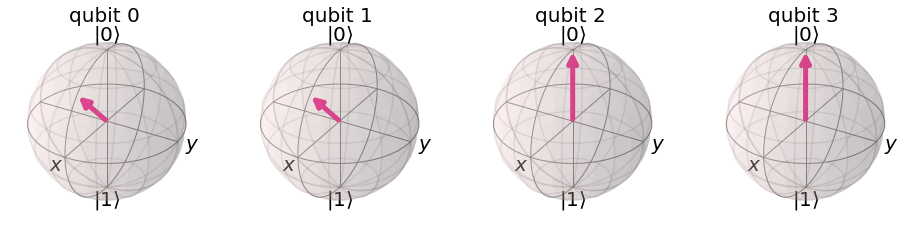

In [5]:
plot_bloch_multivector(orig_statevec)

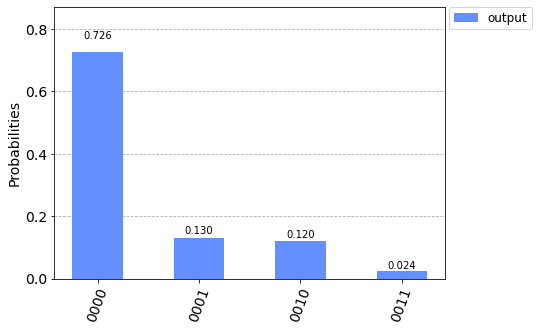

In [24]:
orig_counts = q.execute(c, backend=qasm_sim, shots=1024).result().get_counts()
plot_histogram([orig_counts], legend=['output'])

##### Hadamards in front of uncertain qubits

In [25]:
c = q.QuantumCircuit(4,4)
c.h(0)
c.h(3)
c.ry(math.pi/4,0)
c.ry(math.pi/4,1)
statevec = q.execute(c, backend=statevec_sim).result().get_statevector()
c.measure([0,1], [0,1]) # measuring qubit 3, which is impacted by those cnots:
c.draw()

┌───┐   ┌─────────┐┌─┐
q_0: ───┤ H ├───┤ Ry(π/4) ├┤M├
     ┌──┴───┴──┐└───┬─┬───┘└╥┘
q_1: ┤ Ry(π/4) ├────┤M├─────╫─
     └─────────┘    └╥┘     ║ 
q_2: ────────────────╫──────╫─
        ┌───┐        ║      ║ 
q_3: ───┤ H ├────────╫──────╫─
        └───┘        ║      ║ 
c: 4/════════════════╩══════╩═
                     1      0

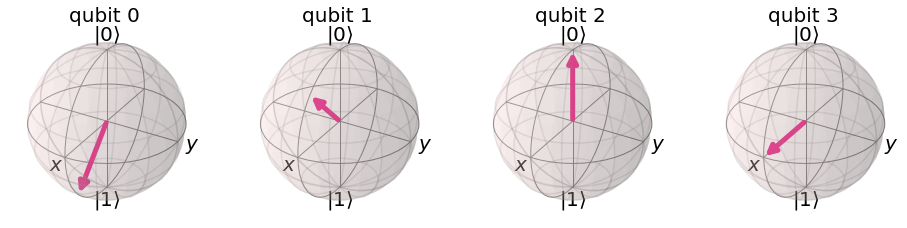

In [26]:
plot_bloch_multivector(statevec)

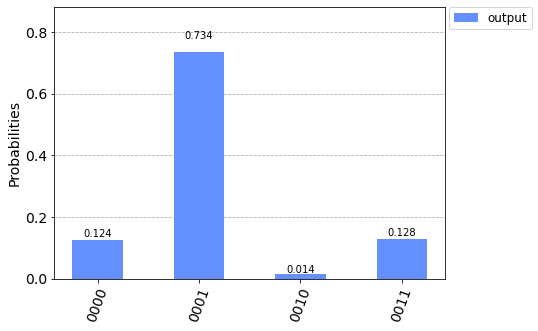

In [27]:
counts = q.execute(c, backend=qasm_sim, shots=1024).result().get_counts()
plot_histogram([counts], legend=['output'])

##### Hadamards in front of uncertain qubits

In [28]:
c = q.QuantumCircuit(4,4)
c.h(0)
c.h(1)
c.ry(math.pi/4,0)
c.ry(math.pi/4,1)
c.h(0)
c.h(1)
statevec = q.execute(c, backend=statevec_sim).result().get_statevector()
c.measure([0,1], [0,1]) # measuring qubit 3, which is impacted by those cnots:
c.draw()

┌───┐┌─────────┐┌───┐┌─┐   
q_0: ┤ H ├┤ Ry(π/4) ├┤ H ├┤M├───
     ├───┤├─────────┤├───┤└╥┘┌─┐
q_1: ┤ H ├┤ Ry(π/4) ├┤ H ├─╫─┤M├
     └───┘└─────────┘└───┘ ║ └╥┘
q_2: ──────────────────────╫──╫─
                           ║  ║ 
q_3: ──────────────────────╫──╫─
                           ║  ║ 
c: 4/══════════════════════╩══╩═
                           0  1

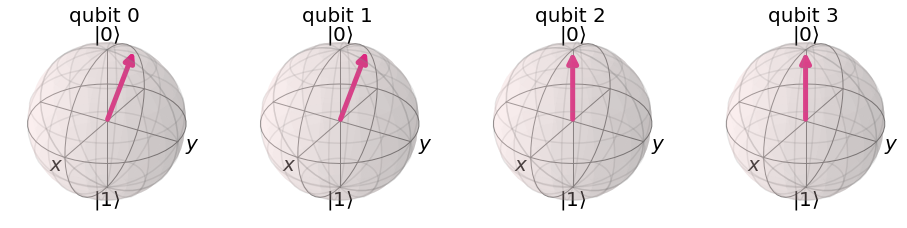

In [29]:
plot_bloch_multivector(statevec)

<b>Compared to the original:</b>

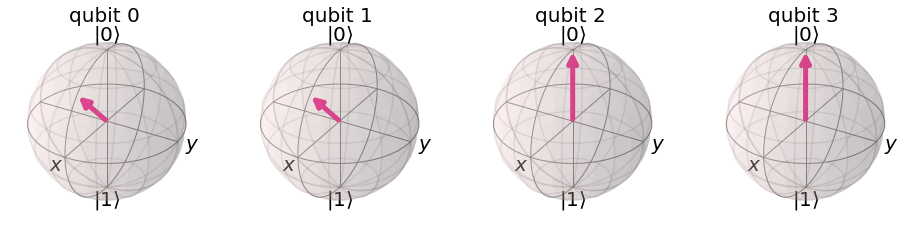

In [30]:
plot_bloch_multivector(orig_statevec)

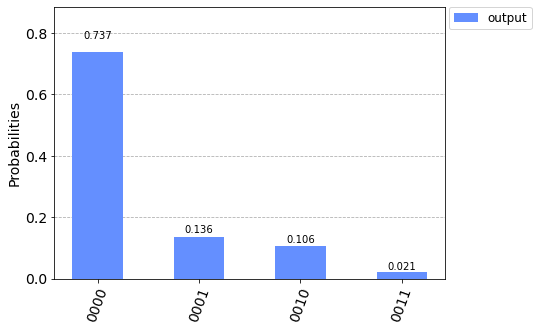

In [32]:
counts = q.execute(c, backend=qasm_sim, shots=1024).result().get_counts()
plot_histogram([counts], legend=['output'])

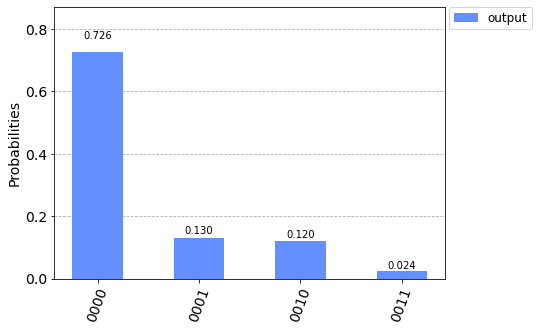

In [33]:
plot_histogram([orig_counts], legend=['output'])

This Hadamard sandwich appears to cause something to occur to the qubit, but not the distribution/output.

##### Original circuit w/ certain qubits

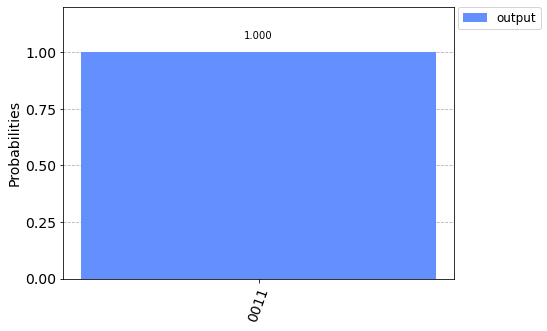

In [37]:
c = q.QuantumCircuit(4,4)
c.x(0)
c.x(1)
orig_statevec = q.execute(c, backend=statevec_sim).result().get_statevector()
c.measure([0,1], [0,1]) # measuring qubit 3, which is impacted by those cnots:
orig_counts = q.execute(c, backend=qasm_sim, shots=1024).result().get_counts()
plot_histogram([orig_counts], legend=['output'])

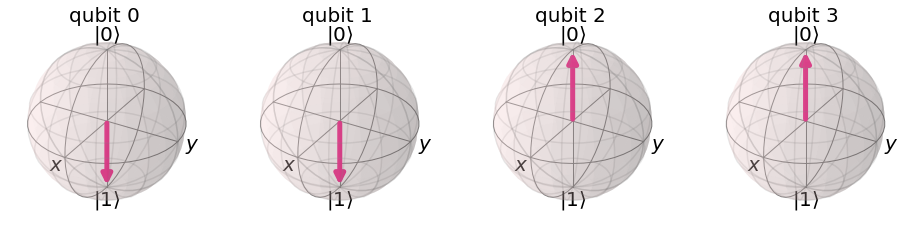

In [38]:
plot_bloch_multivector(orig_statevec)

##### Hadamards in front of Certain Qubits

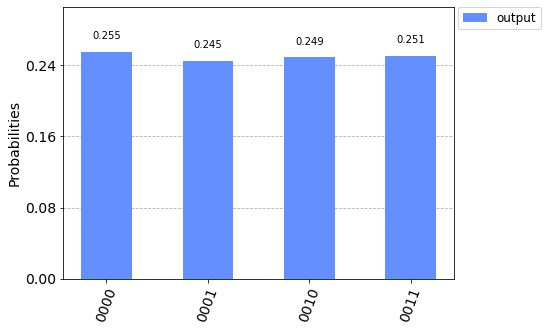

In [39]:
c = q.QuantumCircuit(4,4)
c.h(0)
c.h(1)
c.x(0)
c.x(1)
statevec = q.execute(c, backend=statevec_sim).result().get_statevector()
c.measure([0,1], [0,1]) # measuring qubit 3, which is impacted by those cnots:
counts = q.execute(c, backend=qasm_sim, shots=1024).result().get_counts()
plot_histogram([counts], legend=['output'])

##### Hadamard sandwich of certain qubits

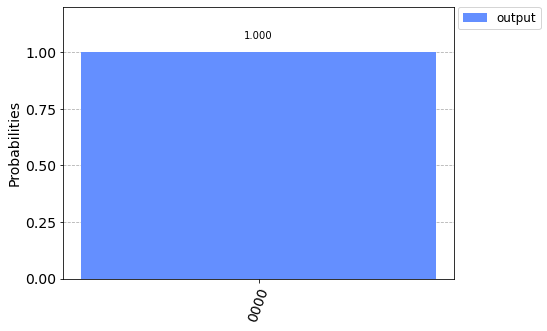

In [40]:
c = q.QuantumCircuit(4,4)
c.h(0)
c.h(1)
c.x(0)
c.x(1)
c.h(0)
c.h(1)
statevec = q.execute(c, backend=statevec_sim).result().get_statevector()
c.measure([0,1], [0,1]) # measuring qubit 3, which is impacted by those cnots:
counts = q.execute(c, backend=qasm_sim, shots=1024).result().get_counts()
plot_histogram([counts], legend=['output'])

<b>Originally:</b>

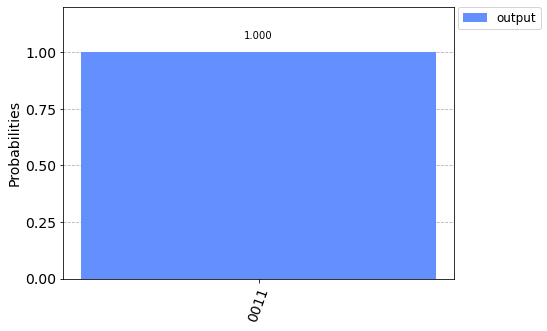

In [42]:
plot_histogram([orig_counts], legend=['output'])

Despite the superpositions, all that appears to have happened is that the output distribution went from 100% 00 to 100% 11, which is strange because the Hadamard Sandwich seemed to maintain the same probability distribution for uncertain qubits.

In [43]:
def balanced_black_box(c):
    c.cx(0,2)
    c.cx(1,2)
    return c
    
def constant_black_box(c):
    # outputs whatever you put in. 
    return c

 the balanced box is dependent on this entangled relationship with qubit at index 0, which will soon be in superposition.

In [44]:
c = q.QuantumCircuit(3,2)
c = balanced_black_box(c)
c.draw()

q_0: ──■───────
       │       
q_1: ──┼────■──
     ┌─┴─┐┌─┴─┐
q_2: ┤ X ├┤ X ├
     └───┘└───┘
c: 2/══════════

##### Hadamard Sandwich

In [46]:
c = q.QuantumCircuit(3,2)
c.h(0)
c.h(1)
c.h(2)
c = balanced_black_box(c)
c.h(0)
c.h(1)
# no need for ending H on q[2]
c.draw()

┌───┐     ┌───┐     
q_0: ┤ H ├──■──┤ H ├─────
     ├───┤  │  └───┘┌───┐
q_1: ┤ H ├──┼────■──┤ H ├
     ├───┤┌─┴─┐┌─┴─┐└───┘
q_2: ┤ H ├┤ X ├┤ X ├─────
     └───┘└───┘└───┘     
c: 2/════════════════════

Things are starting to look messy, so let's use barrier for clarity:

In [48]:
c = q.QuantumCircuit(3,2)
c.h(0)
c.h(1)
c.h(2)
c.barrier()
c = balanced_black_box(c)
c.barrier()
c.h(0)
c.h(1)
# no need for ending H on q[2]
c.draw()

┌───┐ ░            ░ ┌───┐
q_0: ┤ H ├─░───■────────░─┤ H ├
     ├───┤ ░   │        ░ ├───┤
q_1: ┤ H ├─░───┼────■───░─┤ H ├
     ├───┤ ░ ┌─┴─┐┌─┴─┐ ░ └───┘
q_2: ┤ H ├─░─┤ X ├┤ X ├─░──────
     └───┘ ░ └───┘└───┘ ░      
c: 2/══════════════════════════

The barrier is designed to give us some control over the backend optimizer for quantum circuits before they are sent to the quantum machines, but it also helps us visualize sketched circuits more clearly.

#### Not gate then a Hadamard

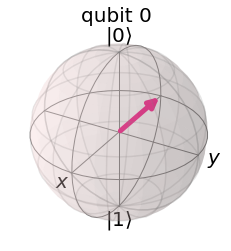

In [49]:
c = q.QuantumCircuit(1,1)
c.x(0)
c.h(0)
statevec = q.execute(c, backend=statevec_sim).result().get_statevector()
plot_bloch_multivector(statevec)

In [50]:
c = q.QuantumCircuit(3,2)
c.x(2)  # adding this not gate
c.barrier() # barrier for clarity
c.h(0)
c.h(1)
c.h(2)
c.barrier()
c = balanced_black_box(c)
c.barrier()
c.h(0)
c.h(1)
# no need for ending H on q[2]... even though it'd make the sandwich look better :(
c.draw()

░ ┌───┐ ░            ░ ┌───┐
q_0: ──────░─┤ H ├─░───■────────░─┤ H ├
           ░ ├───┤ ░   │        ░ ├───┤
q_1: ──────░─┤ H ├─░───┼────■───░─┤ H ├
     ┌───┐ ░ ├───┤ ░ ┌─┴─┐┌─┴─┐ ░ └───┘
q_2: ┤ X ├─░─┤ H ├─░─┤ X ├┤ X ├─░──────
     └───┘ ░ └───┘ ░ └───┘└───┘ ░      
c: 2/══════════════════════════════════

Now we just measure! Qubit[2] is just there to get entangled with in that negative hadamard state.

In [51]:
c = q.QuantumCircuit(3,2)
c.x(2)  # adding this not gate
c.barrier() # barrier for clarity
c.h(0)
c.h(1)
c.h(2)
c.barrier()
c = balanced_black_box(c)
c.barrier()
c.h(0)
c.h(1)
c.measure([0,1],[0,1])
# no need for ending H on q[2]... even though it'd make the sandwich look better :(
c.draw()

░ ┌───┐ ░            ░ ┌───┐┌─┐   
q_0: ──────░─┤ H ├─░───■────────░─┤ H ├┤M├───
           ░ ├───┤ ░   │        ░ ├───┤└╥┘┌─┐
q_1: ──────░─┤ H ├─░───┼────■───░─┤ H ├─╫─┤M├
     ┌───┐ ░ ├───┤ ░ ┌─┴─┐┌─┴─┐ ░ └───┘ ║ └╥┘
q_2: ┤ X ├─░─┤ H ├─░─┤ X ├┤ X ├─░───────╫──╫─
     └───┘ ░ └───┘ ░ └───┘└───┘ ░       ║  ║ 
c: 2/═══════════════════════════════════╩══╩═
                                        0  1

#### Balanced Counts

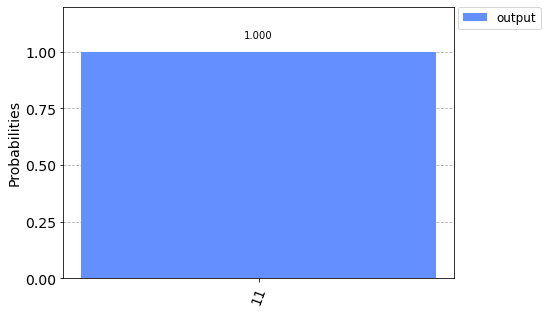

In [52]:
counts = q.execute(c, backend=qasm_sim, shots=1024).result().get_counts()
plot_histogram([counts], legend=['output'])

 for constant box:

In [53]:
c = q.QuantumCircuit(3,2)
c.x(2)
c.barrier()
c.h(0)
c.h(1)
c.h(2)
c.barrier()
c = constant_black_box(c)  # changed to constant box.
c.barrier()
c.h(0)
c.h(1)
c.measure([0,1],[0,1])
c.draw()

░ ┌───┐ ░  ░ ┌───┐┌─┐   
q_0: ──────░─┤ H ├─░──░─┤ H ├┤M├───
           ░ ├───┤ ░  ░ ├───┤└╥┘┌─┐
q_1: ──────░─┤ H ├─░──░─┤ H ├─╫─┤M├
     ┌───┐ ░ ├───┤ ░  ░ └───┘ ║ └╥┘
q_2: ┤ X ├─░─┤ H ├─░──░───────╫──╫─
     └───┘ ░ └───┘ ░  ░       ║  ║ 
c: 2/═════════════════════════╩══╩═
                              0  1

##### Constant Counts

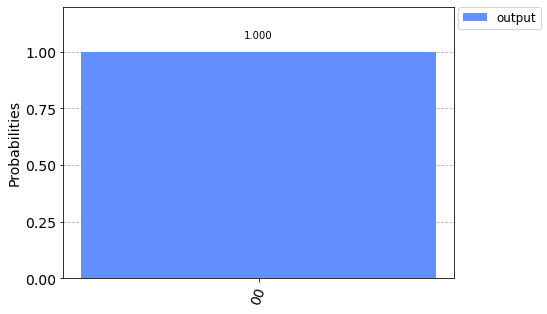

In [54]:
counts = q.execute(c, backend=qasm_sim, shots=1024).result().get_counts()
plot_histogram([counts], legend=['output'])

The use of this Hadamard Sandwich has demonstrated one of Quantum Computing's capabilities: we can assess various attributes of the gates/circuit overall, all in one pass, using the Hadamard Sandwich.

The analysis of balanced/constant is meaningless because the real value here is in demonstrating and comprehending what this quantum circuitry can do, which is rationally consider things while they are still in superposition and entanglement before the measurements collapse everything.

<b>References:</b> <br>
https://www.bbva.com/en/quantum-computing-how-it-differs-from-classical-computing/ <br>
https://www.cantorsparadise.com/quantum-computing-for-laymen-62b74b6e7c2 <br>
https://www.rfwireless-world.com/Terminology/Quantum-Computer-vs-Classical-Computer.html <br>
https://www.quantumcomputinginc.com/blog/quantum-and-classical-key-differences/ <br>
https://www.cbinsights.com/research/quantum-computing-classical-computing-comparison-infographic/ <br>
https://bernardmarr.com/15-things-everyone-should-know-about-quantum-computing/ <br>
https://github.com/ianmcloughlin/quantum-computing/blob/main/deutsch.ipynb <br>
https://qiskit.org/textbook/ch-quantum-hardware/error-correction-repetition-code.html <br>
https://www.youtube.com/watch?v=pq2Okr_BO-Y <br>
https://www.youtube.com/watch?v=_BHvE_pwF6E <br>
https://quantum-computing.ibm.com/admin/docs/admin/guide/deutsch-jozsa-algorithm

## End
<hr>